# Problem Statement -
To predict the amount of fire forest burn area


Predicting the amount of land burnt during forest fires is one of the challenging
tasks.Forest fire causes serious damage to the flora and fauna of a country.This is one
of major environmental issues which can also affect the economy of a country.Early
prediction of fires saves large number of flora and fauna and prevents the ecosystem.By predicting the area burnt we can also classify whether the fire into small or
big.The key motivation for this prediction is to help fire management team in proper
resource allocation and to help the firefighters in a best possible way.The meteorological conditions of the forest are the key factors of the forest fire. These climatic data
can be obtained using the local sensors which are incorporated in the nearest meteorological stations. This research proposes various Machine learning approaches
such as Linear regression, logistic regression,SVR,Random forest,Gradient boosting
and Bagging for predicting the amount of land burnt in the forest.Here the predictive model is build using the outbreaks of fire caused in the northeast region of
Portugal.

In [145]:
#Importing the necessary libraries

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random
from pandas.plotting import scatter_matrix
%matplotlib inline 
import seaborn as sns


In [146]:
#https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi--- to know about FFMC,DMC,DC,ISI detail in 
#forest fuel(logs,downded tress,small twigs etc)
#RH-Relative humiditiy
#X.y --axes of forest area


In [147]:
#FFMC,DMC,DC,ISI detail image

# 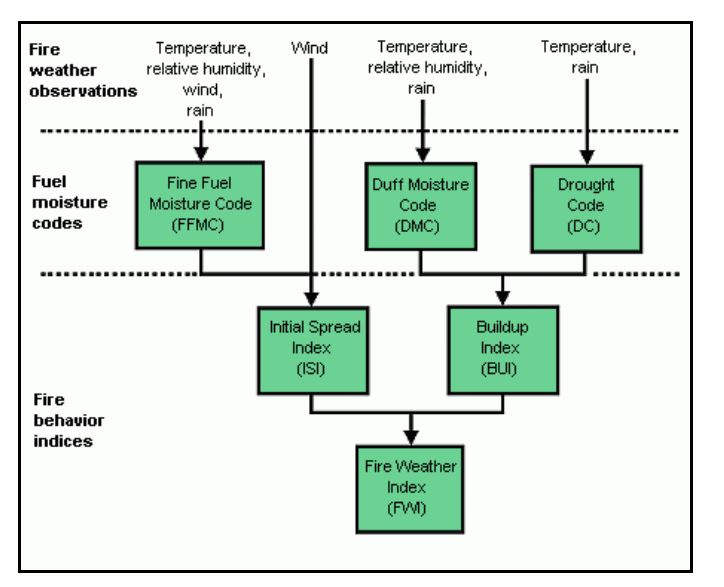

In [148]:
#x and y axis of forest area

# 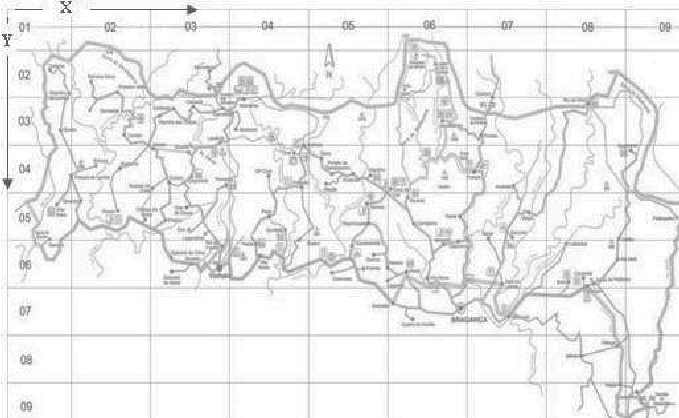

In [149]:
# Loading the dataset
dataset = pd.read_csv('forest_fires.csv')

In [150]:
#Printing the first 5  rows of the loaded Dataset
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [151]:
# Extracting the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [152]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [153]:
features_with_na

[]

In [154]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [156]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  11


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


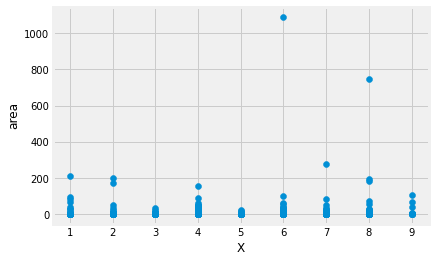

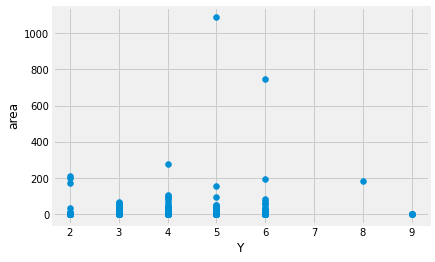

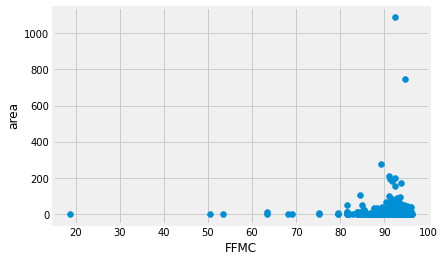

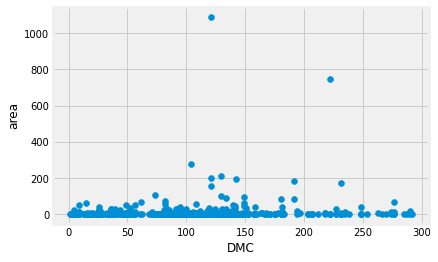

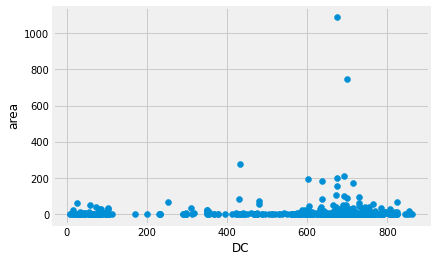

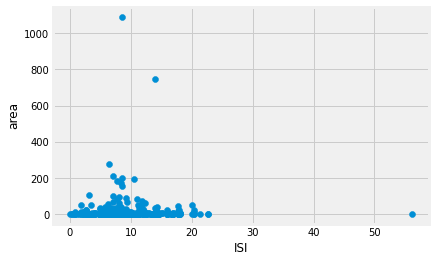

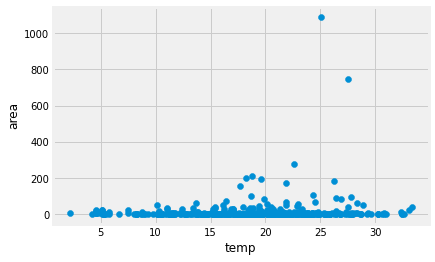

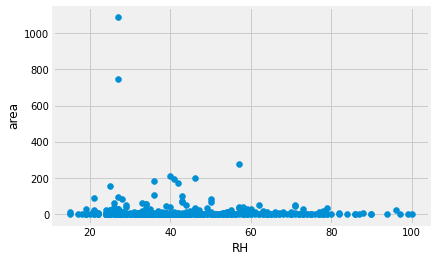

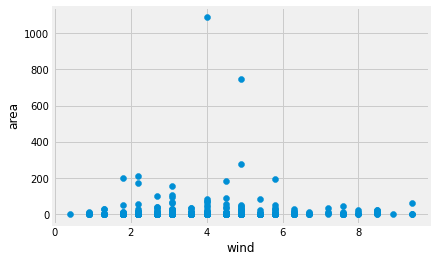

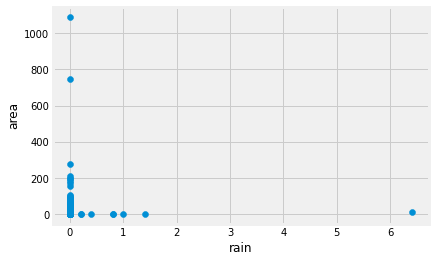

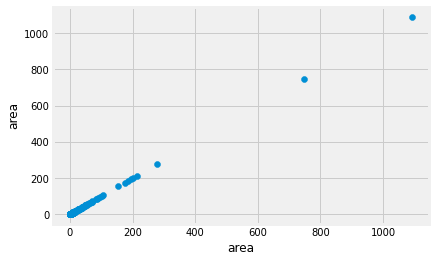

In [157]:
for feature in numerical_features:
    
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
#         data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['area'])
        plt.xlabel(feature)
        plt.ylabel('area')
        plt.show()

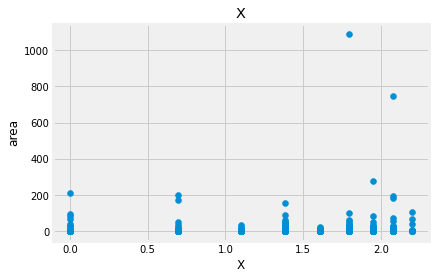

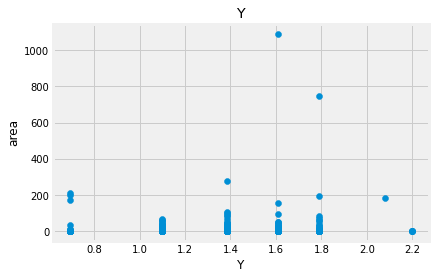

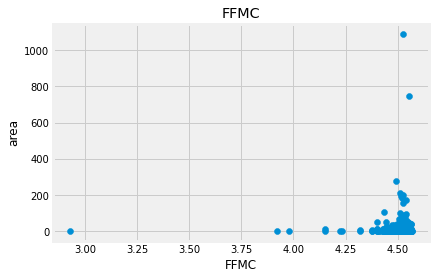

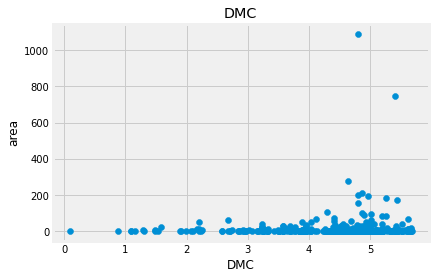

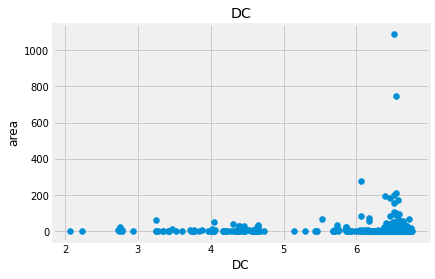

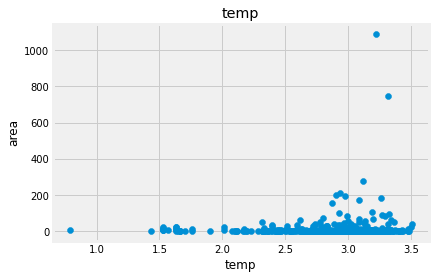

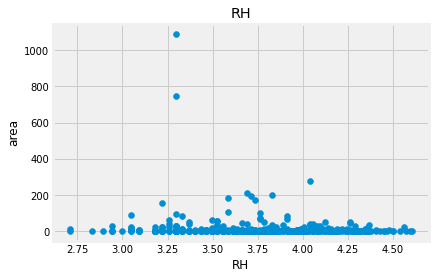

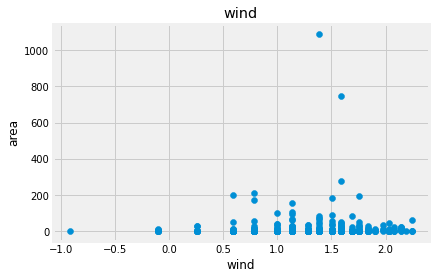

In [85]:
for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
#         data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['area'])
        plt.xlabel(feature)
        plt.ylabel('area')
        plt.title(feature)
        plt.show()

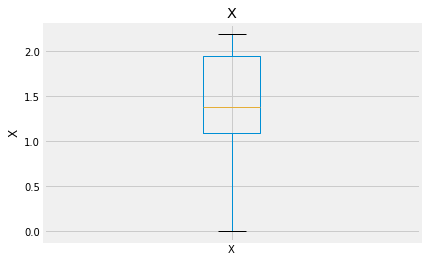

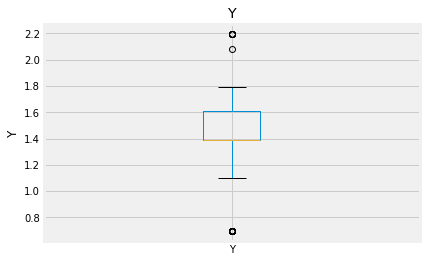

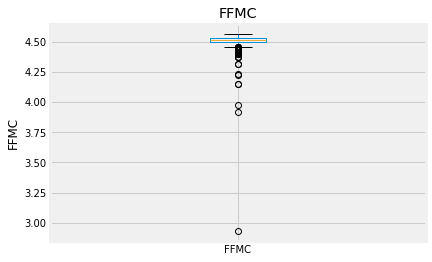

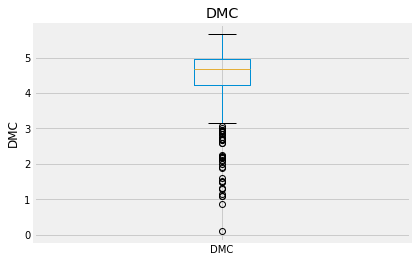

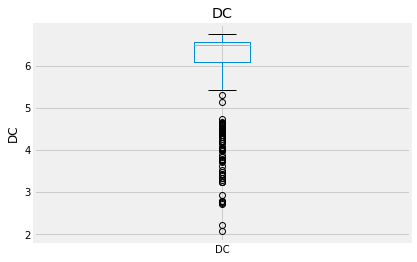

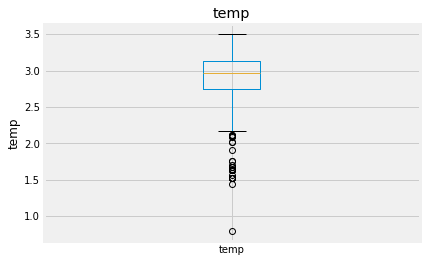

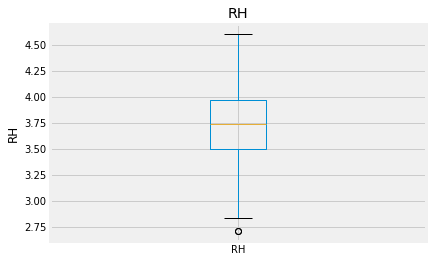

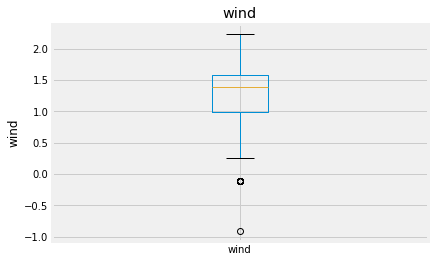

In [158]:
# to find outliers in continuous variables
for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [159]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['month', 'day']

In [160]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is month and number of categories are 12
The feature is day and number of categories are 7


In [161]:
def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') #Use matplotlib style settings from a style specification.
    fig = plt.figure(figsize=(width,height)) #Create a new figure
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # customizing the subplots
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #print(rows)
    #iterating over the columns and then showing the data distribution in various columns
    for i, column in enumerate(dataset.columns):
        # print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        # print('after',i,cols)
        # print(column)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: # plot counts of different values if the column has a datatype object
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            #print(substrings)
            g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()


C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Depr

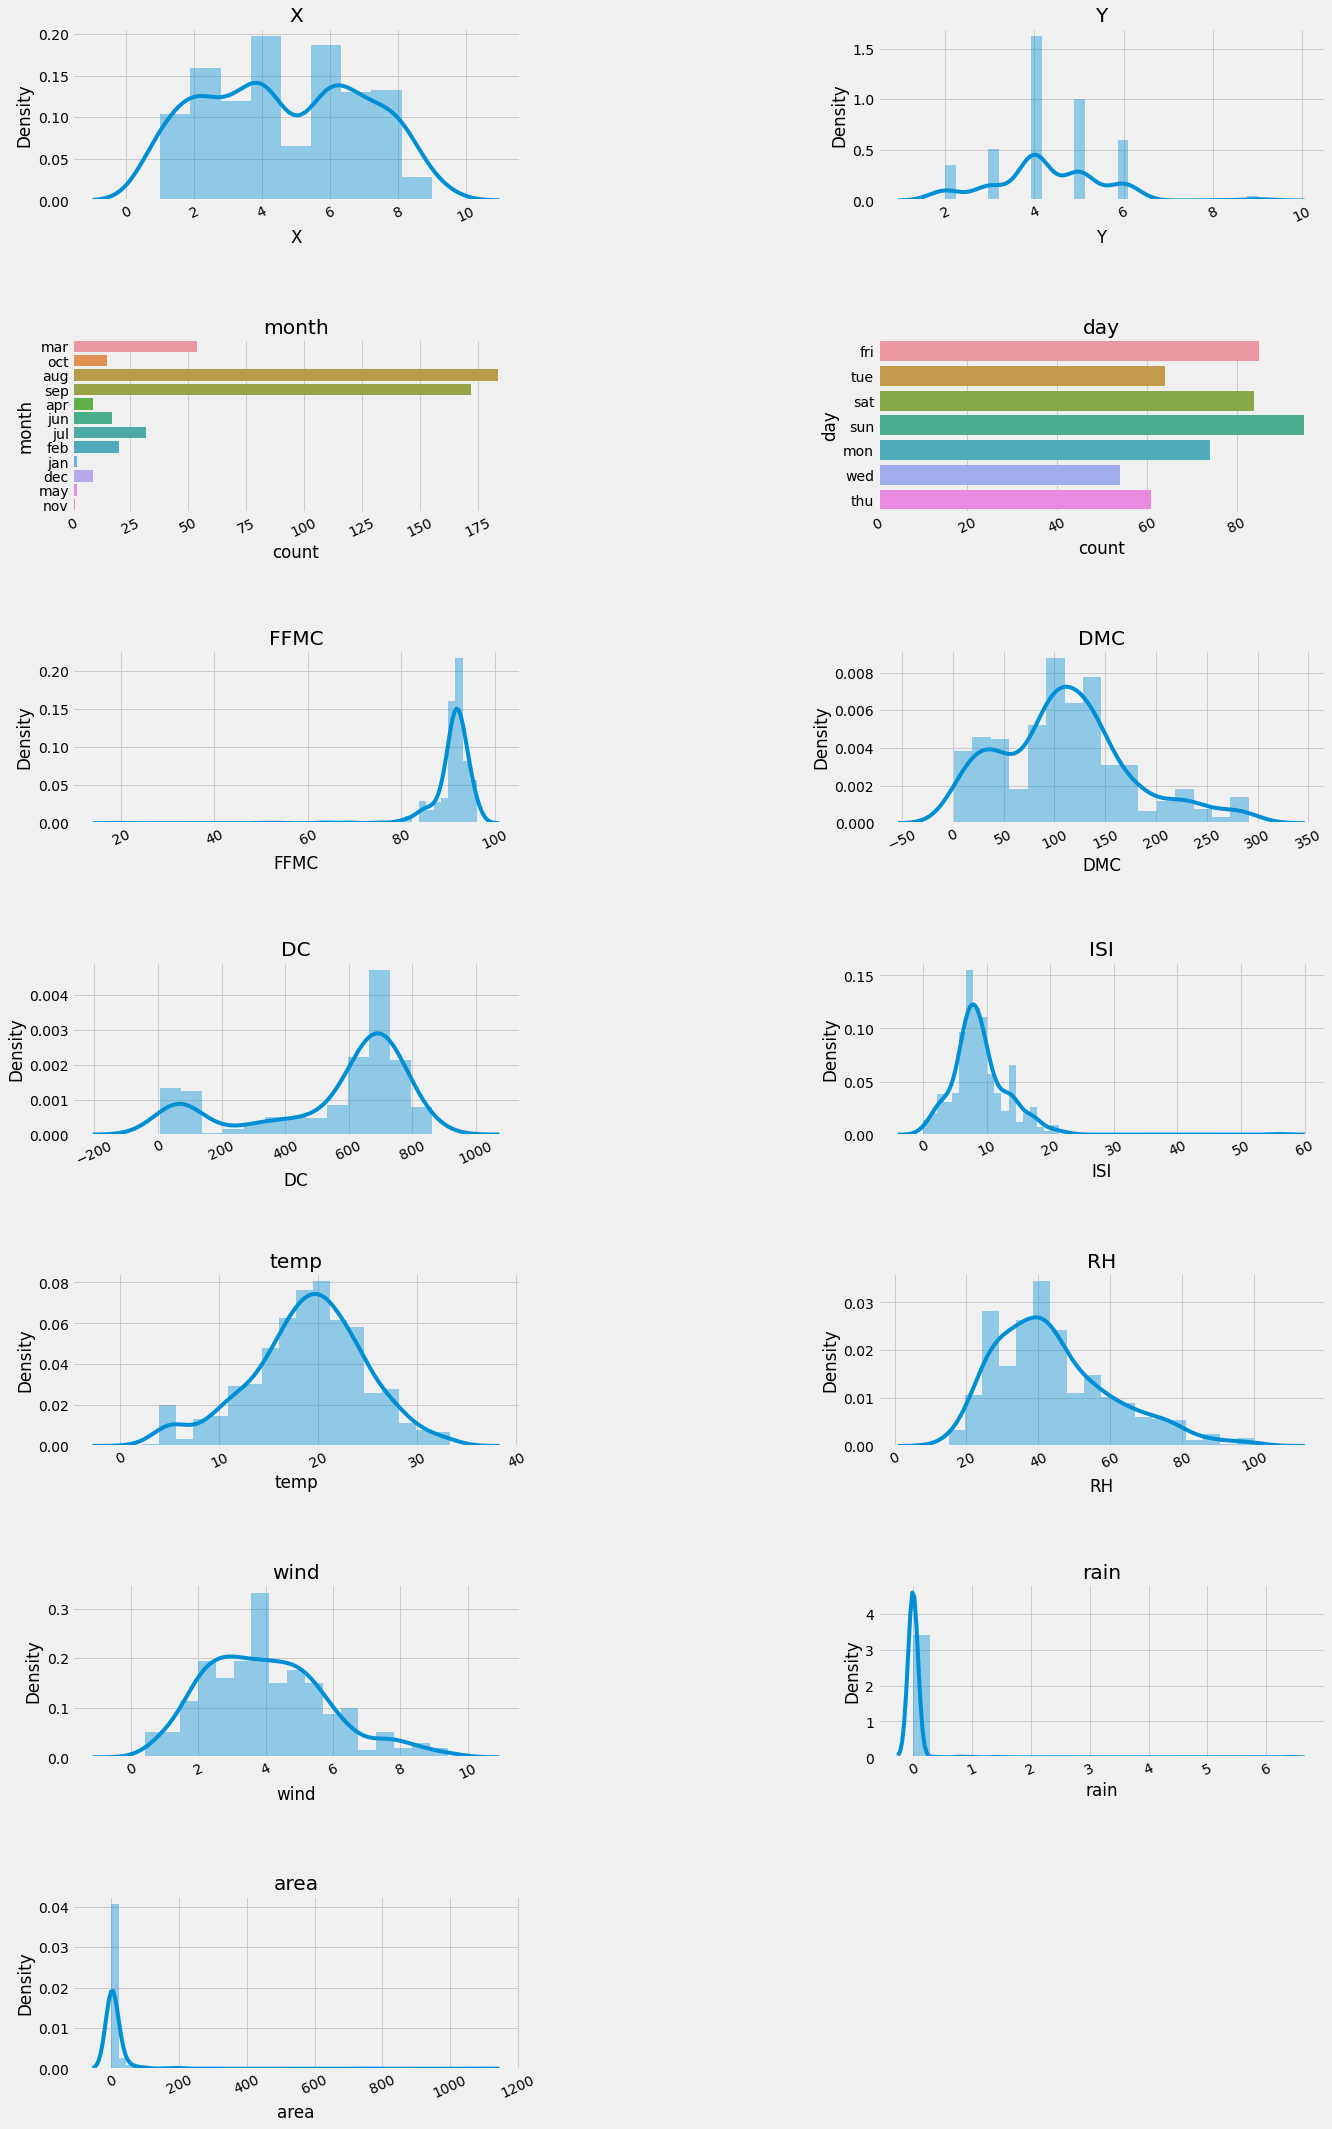

In [162]:
#  creating  columnwise histograms
plot_distribution(dataset, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

In [163]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['area'],test_size=0.1,random_state=0)

In [164]:
X_train.columns,X_test.columns

(Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
        'wind', 'rain', 'area'],
       dtype='object'),
 Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
        'wind', 'rain', 'area'],
       dtype='object'))

In [165]:
X_train.shape,X_test.shape


((465, 13), (52, 13))

In [166]:
categorical_features=[feature for feature in X_train.columns if X_train[feature].dtype=='O']

In [167]:
X_train.month.unique()

array(['mar', 'sep', 'oct', 'feb', 'aug', 'jun', 'apr', 'jul', 'nov',
       'jan', 'dec', 'may'], dtype=object)

In [168]:
X_train.day.unique()

array(['sun', 'thu', 'mon', 'tue', 'fri', 'sat', 'wed'], dtype=object)

In [169]:
X_train.rain.unique()

array([0. , 0.8, 0.4, 6.4, 0.2, 1.4, 1. ])

In [170]:
#converting all categories into numberical value levels

for feature in categorical_features:
    labels_ordered=X_train.groupby([feature])['area'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_train[feature]=X_train[feature].map(labels_ordered)

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
feature_scale=[feature for feature in X_train.columns if feature not in ['month','day']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [172]:
scaler.transform(X_train[feature_scale])

array([[0.375     , 0.57142857, 0.91096774, ..., 0.47058824, 0.        ,
        0.        ],
       [0.625     , 0.14285714, 0.95612903, ..., 0.74117647, 0.        ,
        0.0460417 ],
       [0.625     , 0.14285714, 0.93935484, ..., 0.47058824, 0.        ,
        0.00817388],
       ...,
       [0.75      , 0.42857143, 0.95225806, ..., 0.36470588, 0.        ,
        0.        ],
       [0.        , 0.28571429, 0.95225806, ..., 0.15294118, 0.        ,
        0.01088063],
       [0.125     , 0.        , 0.98193548, ..., 0.42352941, 0.        ,
        0.01167122]])

In [173]:
# transform the train and test set, and add on the Id and SalePrice variables
data_train = pd.concat([X_train[['month','day']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [174]:
data_train

,month,day,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,1,0.375,0.571429,0.910968,0.172984,0.110590,0.171123,0.270096,0.364706,0.470588,0.0,0.000000
1,8,6,0.625,0.142857,0.956129,0.406272,0.909581,0.133690,0.536977,0.223529,0.741176,0.0,0.046042
2,8,2,0.625,0.142857,0.939355,0.444521,0.937258,0.133690,0.321543,0.600000,0.470588,0.0,0.008174
3,4,4,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.000000,0.0,0.000000
4,5,6,1.000,1.000000,0.845161,0.019642,0.021930,0.137255,0.144695,0.752941,0.258824,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,2,0,0.375,0.428571,0.935484,0.162646,0.105430,0.222816,0.437299,0.141176,0.788235,0.0,0.000000
461,9,2,0.250,0.285714,0.860645,0.083735,0.400844,0.046346,0.077170,0.070588,0.894118,0.0,0.014378
462,8,5,0.750,0.428571,0.952258,0.299449,0.810015,0.126560,0.662379,0.294118,0.364706,0.0,0.000000
463,8,0,0.000,0.285714,0.952258,0.416609,0.916852,0.181818,0.607717,0.282353,0.152941,0.0,0.010881


In [175]:
#X_test


In [176]:
categorical_features=[feature for feature in X_test.columns if X_test[feature].dtype=='O']

In [177]:
#converting all categories into numberical value levels

for feature in categorical_features:
    labels_ordered=X_test.groupby([feature])['area'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_test[feature]=X_test[feature].map(labels_ordered)

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
X_test

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
213,7,3,2,2,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35
435,2,5,1,6,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00
343,8,6,7,2,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
230,4,4,7,3,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
171,8,6,5,3,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69
15,6,5,7,1,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00
162,6,3,2,6,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0,1.94
489,4,4,5,3,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0,0.00
381,8,6,5,4,90.7,194.1,643.0,6.8,16.2,63,2.7,0.0,16.33
96,3,4,0,6,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00


In [180]:
feature_scale=[feature for feature in X_test.columns if feature not in ['month','day']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_test[feature_scale])

MinMaxScaler()

In [181]:
scaler.transform(X_test[feature_scale])

array([[8.57142857e-01, 2.50000000e-01, 4.13793103e-01, 1.70850767e-01,
        1.01721253e-01, 1.92546584e-01, 2.42424242e-01, 4.38596491e-01,
        6.00000000e-01, 0.00000000e+00, 2.50724213e-02],
       [1.42857143e-01, 7.50000000e-01, 6.34482759e-01, 2.84170153e-01,
        4.27803012e-01, 2.29813665e-01, 7.27272727e-01, 5.26315789e-01,
        1.55555556e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 6.82758621e-01, 4.42468619e-01,
        9.42385847e-01, 3.47826087e-01, 4.28030303e-01, 5.26315789e-01,
        4.55555556e-01, 0.00000000e+00, 1.99845990e-03],
       [4.28571429e-01, 5.00000000e-01, 7.79310345e-01, 4.53626220e-01,
        8.13889553e-01, 4.53416149e-01, 8.25757576e-01, 0.00000000e+00,
        4.55555556e-01, 0.00000000e+00, 8.11209710e-02],
       [1.00000000e+00, 1.00000000e+00, 2.75862069e-01, 3.04044630e-01,
        7.06311260e-01, 2.91925466e-01, 4.84848485e-01, 5.08771930e-01,
        4.00000000e-01, 0.00000000e+00, 2.46598951e-

In [182]:
# transform the train and test set, and add on the Id and SalePrice variables
data_test= pd.concat([X_test[['month','day']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)

In [184]:
data_test.shape


(52, 13)

In [186]:
data_test.head()

,month,day,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,2,0.857143,0.25,0.413793,0.170851,0.101721,0.192547,0.242424,0.438596,0.600000,0.0,0.025072
1,1,6,0.142857,0.75,0.634483,0.284170,0.427803,0.229814,0.727273,0.526316,0.155556,0.0,0.000000
2,7,2,1.000000,1.00,0.682759,0.442469,0.942386,0.347826,0.428030,0.526316,0.455556,0.0,0.001998
3,7,3,0.428571,0.50,0.779310,0.453626,0.813890,0.453416,0.825758,0.000000,0.455556,0.0,0.081121
4,5,3,1.000000,1.00,0.275862,0.304045,0.706311,0.291925,0.484848,0.508772,0.400000,0.0,0.002466


# Data vizualization

<AxesSubplot:xlabel='X', ylabel='Y'>

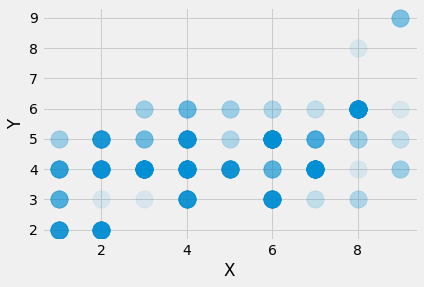

In [187]:
dataset.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset

<AxesSubplot:xlabel='X', ylabel='Y'>

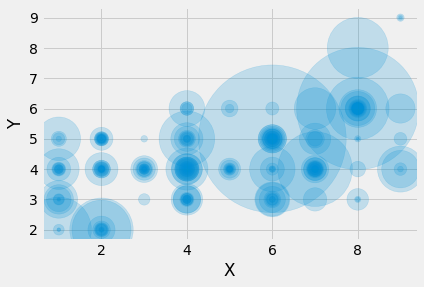

In [188]:
dataset.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*dataset['area']) # plotting the graphs by increasing the size to see the affect of area over the datapoints

<AxesSubplot:xlabel='X', ylabel='Y'>

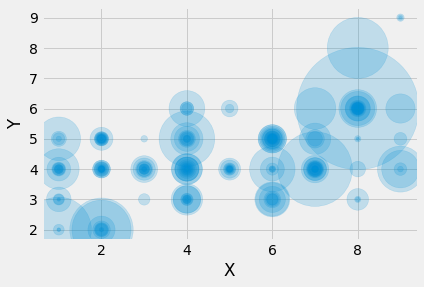

In [189]:
X_train.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*X_train['area']) # 

<AxesSubplot:xlabel='X', ylabel='Y'>

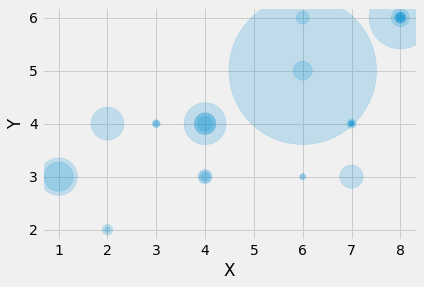

In [190]:
X_test.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*X_test['area']) # 

In [191]:
dataset.area

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64